In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import iqr

В этом мини-проекте мы посчитаем несколько продуктовых метрик и посмотрим, какие распределения могут встретиться на практике.

In [44]:
df = pd.read_csv('C:/Users/askha/Downloads/conversion.csv')
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2


In [6]:
df.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [10]:
df.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [17]:
# Сколько уникальных рекламных кампаний было проведено? 
df.xyz_campaign_id.nunique()

3

Постройте график распределения числа показов (Impressions – сколько раз пользователи увидели данное объявление) для каждой рекламной кампании в Facebook, прологарифмировав значения.

In [24]:
df_log = np.log(df.groupby('fb_campaign_id') \
    .agg({'Impressions' : 'sum'}))
df_log

,Impressions
fb_campaign_id,
103916,8.902456
103917,9.790375
103920,6.541030
103928,9.035034
103929,7.557473
...,...
179977,13.937527
179978,13.365386
179979,11.928546


<AxesSubplot:ylabel='Count'>

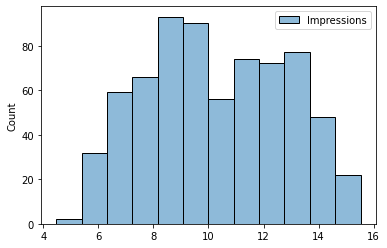

In [61]:
# Распределение бимодальное
sns.histplot(df_log, kde=False)

Теперь посчитаем ещё несколько полезных метрик. Первая – CTR (click-through rate), которая показывает кликабельность, т.е. отношение числа кликов к количеству показов.
Создайте новую колонку, затем посмотрите на описательные статистики. В качестве ответа укажите ad_id объявления с наибольшим CTR.

In [49]:
df['CTR'] = df['Clicks'] / df['Impressions']
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,0.000136
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,0.000112
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,0.000235
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,0.000242
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,0.000223
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,0.000188
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,0.000185
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2,0.000171


In [52]:
df.CTR.describe()

count    1143.000000
mean        0.000164
std         0.000115
min         0.000000
25%         0.000100
50%         0.000160
75%         0.000234
max         0.001059
Name: CTR, dtype: float64

In [53]:
df.CTR.idxmax()

150

In [54]:
df.iloc[150]

ad_id                    738637
xyz_campaign_id             936
fb_campaign_id           109857
age                       45-49
gender                        F
interest                     24
Impressions                 944
Clicks                        1
Spent                      1.42
Total_Conversion              1
Approved_Conversion           0
CTR                    0.001059
Name: 150, dtype: object

Визуализируйте CTR с разбивкой по номеру рекламной кампании (xyz_campaign_id) 916.

In [57]:
df_916 = df.query('xyz_campaign_id == 916')

<AxesSubplot:xlabel='CTR', ylabel='Count'>

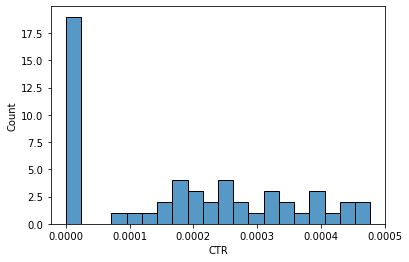

In [60]:
sns.histplot(df_916.CTR, bins=20, kde=False)

CPC (cost-per-click) – стоимость за клик пользователя по объявлению. Рассчитывается путём деления суммы потраченных денег на общее число кликов:

CPC= 
spent
/clicks

Выведите описательные статистики для новой переменной, посмотрите на форму распределения. В ответе укажите межквартильный размах, округленный до двух знаков после точки.

Обратите внимание, что в столбце могут встретиться NaN. 

In [64]:
df['CPC'] = df['Spent'] / df['Clicks']
df.CPC.describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: CPC, dtype: float64

In [66]:
# межквартильный размах
iqr(df.CPC, nan_policy='omit').round(2)

0.25

<AxesSubplot:xlabel='CPC', ylabel='Count'>

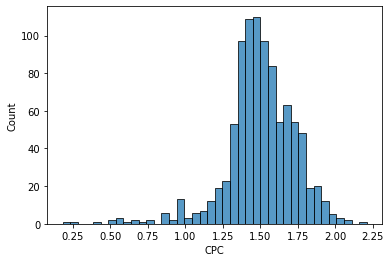

In [73]:
sns.histplot(df.CPC.dropna(), kde=False)

Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CPC', ylabel='Density'>

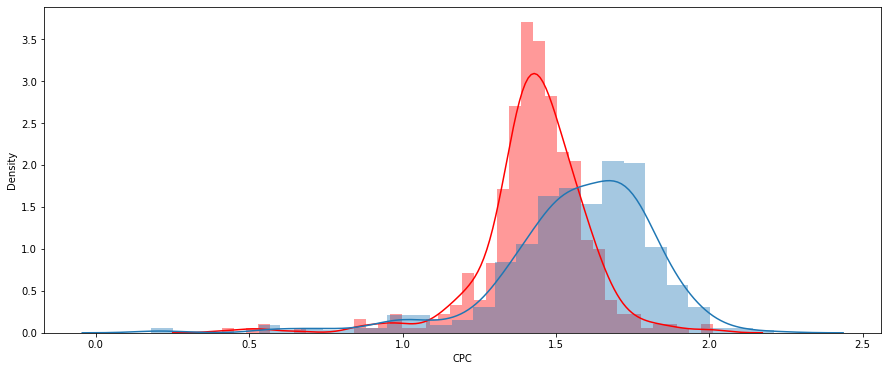

In [90]:
fig = plt.subplots(figsize=(15, 6))
sns.distplot(df.query('gender == "F"').CPC.dropna(), color='Red')
sns.distplot(df.query('gender == "M"').CPC.dropna())

Конверсия (conversion rate) – отношение числа пользователей, совершивших целевое действие на определенном этапе, к общему числу тех, кто дошел до данного этапа.

Посчитайте конверсию из клика в покупку. В качестве ответа укажите конверсию для объявления 1121814 в процентах, округлив значение до 2 знаков после точки.

In [93]:
df['CR'] = (df['Approved_Conversion'] / df['Clicks'] * 100).round(2)
df.query('ad_id == 1121814').CR

860    3.09
Name: CR, dtype: float64